## IMPORTING LIBRARIES

In [24]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

## LOADING THE DATASET

In [25]:
train=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

## PREPROCESSING AND VISUALIZING THE DATASET

Label for the image is:  B


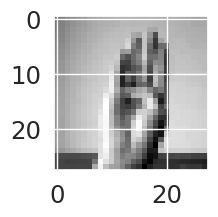

In [26]:
#Datasets as numpy arrays
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

#Define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

#Sanity check - plot an image and label
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray') 
print("Label for the image is: ", class_names[int(train_data[i,0])])


Text(0.5, 1.0, 'Label')

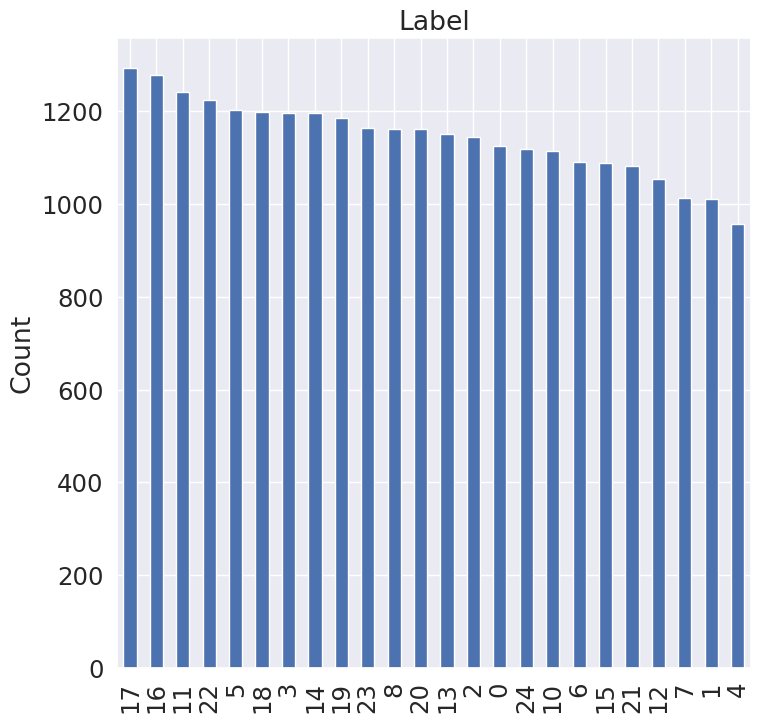

In [27]:
# Data distribution visualization
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

#Dataset seems to be fairly balanced.

In [28]:
#Normalize / scale X values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

#Convert y to categorical if planning on using categorical cross entropy
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

#Reshape for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))


## CREATING AND TRAINING THE MODEL

In [35]:
#Model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())


model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))


#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy. 

model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()


history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 5, 5, 64)         

2023-04-29 10:52:48.984065: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/dropout_20/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


215/215 [==============================] - 4s 8ms/step - loss: 2.7554 - acc: 0.1599 - val_loss: 1.6773 - val_acc: 0.4654
Epoch 2/10
215/215 [==============================] - 1s 6ms/step - loss: 1.2537 - acc: 0.5750 - val_loss: 0.8216 - val_acc: 0.7444
Epoch 3/10
215/215 [==============================] - 1s 6ms/step - loss: 0.7516 - acc: 0.7428 - val_loss: 0.5394 - val_acc: 0.8305
Epoch 4/10
215/215 [==============================] - 1s 6ms/step - loss: 0.5064 - acc: 0.8241 - val_loss: 0.4117 - val_acc: 0.8572
Epoch 5/10
215/215 [==============================] - 1s 6ms/step - loss: 0.3603 - acc: 0.8769 - val_loss: 0.3007 - val_acc: 0.8924
Epoch 6/10
215/215 [==============================] - 1s 6ms/step - loss: 0.2757 - acc: 0.9050 - val_loss: 0.2815 - val_acc: 0.8931
Epoch 7/10
215/215 [==============================] - 1s 6ms/step - loss: 0.2170 - acc: 0.9266 - val_loss: 0.2544 - val_acc: 0.9198
Epoch 8/10
215/215 [==============================] - 1s 7ms/step - loss: 0.1733 - acc:

## PLOTTING THE TARINING AND VALIDATION ACCURACY AND LOSS

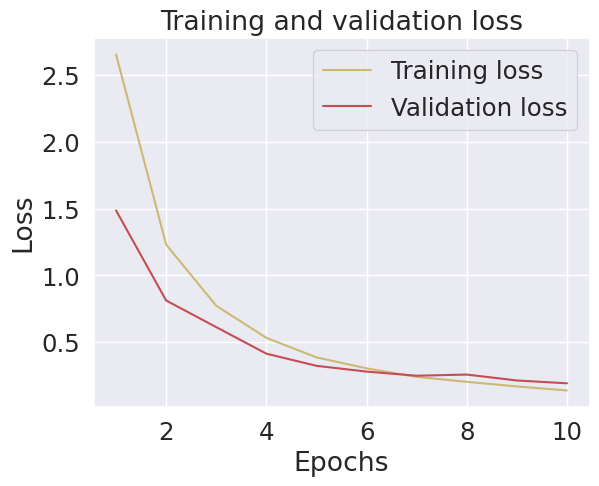

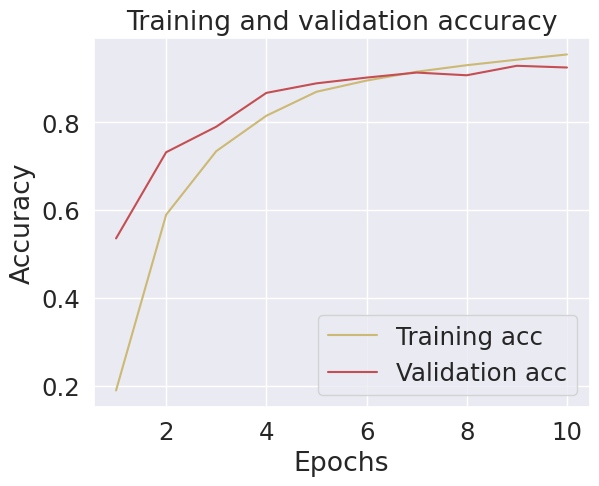

In [30]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## PREDICTING THE CLASS LABELS

In [31]:
prediction = model.predict(X_test)
y_pred = np.argmax(prediction, axis=1)

225/225 [==============================] - 0s 2ms/step


## PLOTTING PREDICTION WITH TRUE AND PREDICTED LABEL AND CHECKING ACCURACY

Accuracy Score =  0.9251254880089236
Predicted Label:  A
True Label:  A


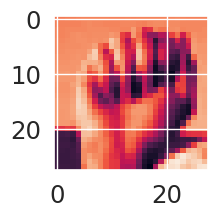

In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score = ', accuracy)

i = random.randint(1,len(y_pred))
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(y_pred[i])])
print("True Label: ", class_names[int(y_test[i])])

## PLOTTING CONFUSION MATRIX

<AxesSubplot:>

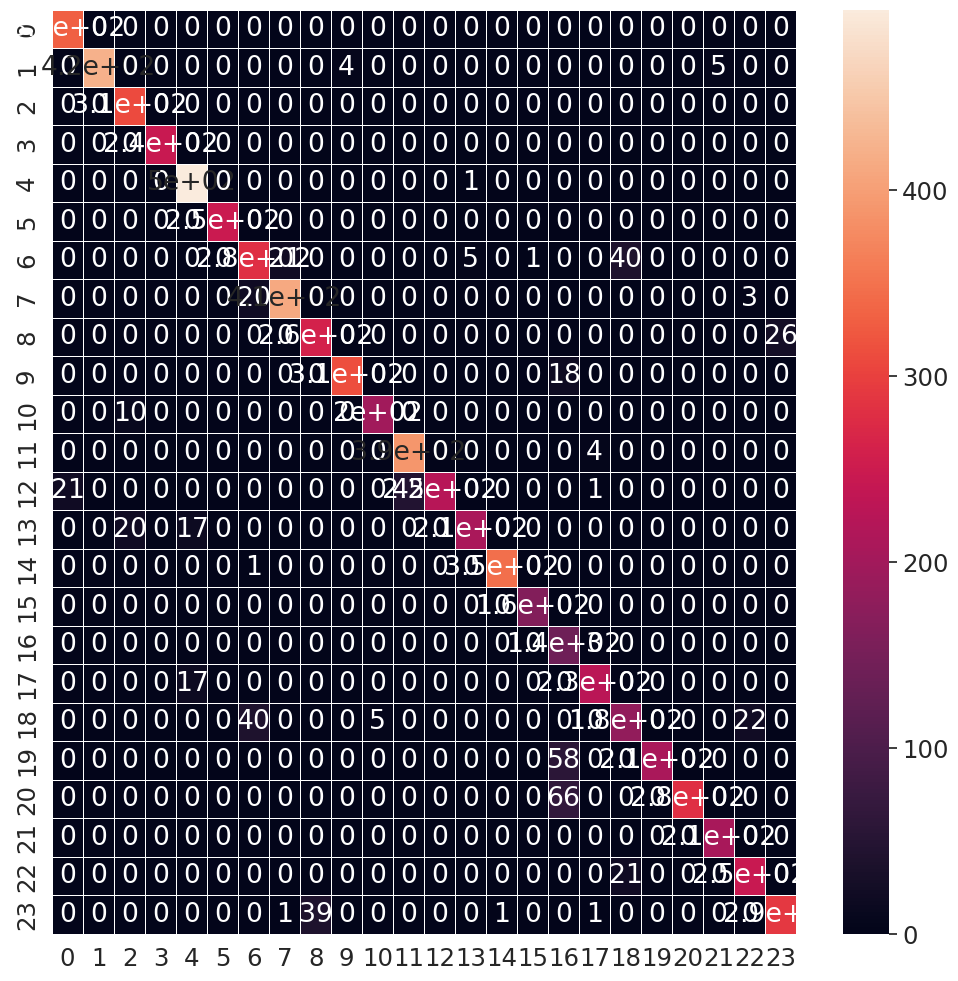

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

## PLOTTING FRACTIONAL INCORRECT MISCLASSIFICATION

([<matplotlib.axis.XTick at 0x7f1337cddf50>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H'),
  Text(8, 0, 'I'),
  Text(9, 0, 'J'),
  Text(10, 0, 'K'),
  Text(11, 0, 'L'),
  Text(12, 0, 'M'),
  Text(13, 0, 'N'),
  Text(14, 0, 'O'),
  Text(15, 0, 'P'),
  Text(16, 0, 'Q'),
  Text(17, 0, 'R'),
  Text(18, 0, 'S'),
  Text(19, 0, 'T'),
  Text(20, 0, 'U'),
  Text(21, 0, 'V'),
  Text(22, 0, 'W'),
  Text(23, 0, 'X'),
  Text(24, 0, 'Y')])

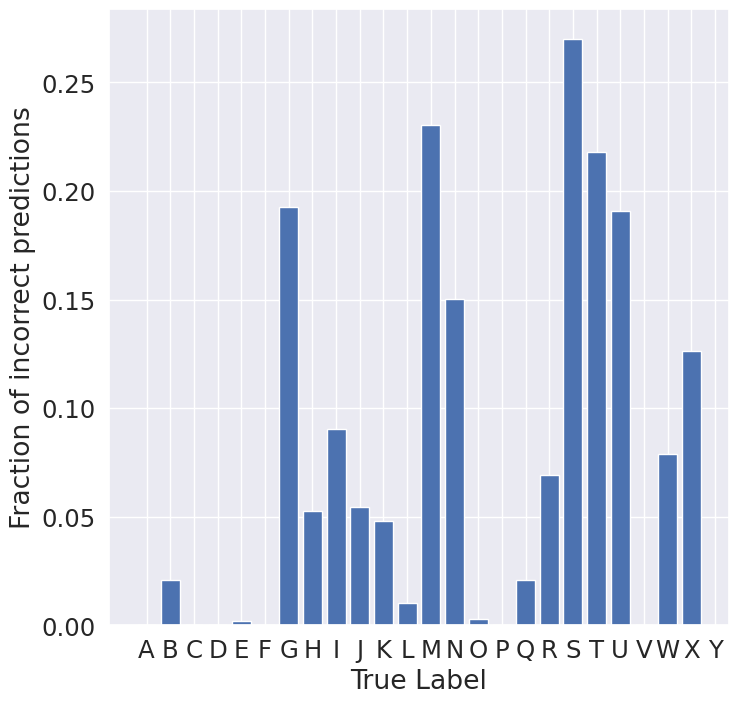

In [47]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(25), class_names)